<a href="https://colab.research.google.com/github/govind527/Pytorch_Practice/blob/main/Pytorch_NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import sklearn

In [2]:
from sklearn.datasets import make_circles

n_samples=1000

X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
X[:5],y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [5]:
##make dataframe
import pandas as pd
circles=pd.DataFrame({"X1":X[:,0],
                      "X2":X[:,1],
                      "label":y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


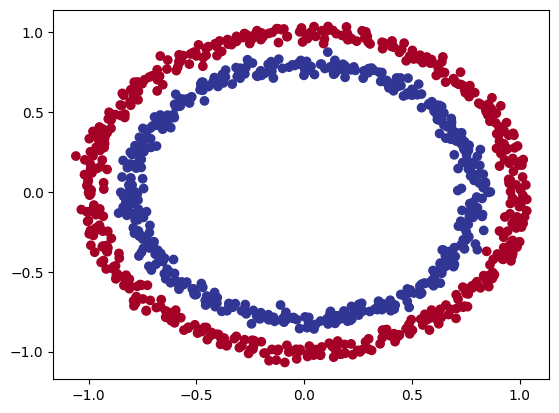

In [6]:
##visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu);

In [7]:
## check input and output shapes
X.shape,y.shape

((1000, 2), (1000,))

In [8]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [9]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [10]:
## view first sample
X_sample=X[0]
y_sample=y[0]
print(f"Sample input of X: {X_sample} and sample output of y: {y_sample}")
print(f"type of X: {type(X_sample)} and type of y: {type(y_sample)}")
print(f"shape of X: {X_sample.shape} and shape of y: {y_sample.shape}")

Sample input of X: [0.75424625 0.23148074] and sample output of y: 1
type of X: <class 'numpy.ndarray'> and type of y: <class 'numpy.int64'>
shape of X: (2,) and shape of y: ()


In [11]:
##turn data into tensor and splitting
import torch
torch.__version__

'2.6.0+cu124'

In [12]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [13]:
X

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]])

In [14]:
X.dtype,y.dtype

(torch.float32, torch.float32)

In [15]:
## split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)


In [16]:
len(X_train),len(y_train)

(800, 800)

In [17]:
len(X_test),len(y_test)

(200, 200)

In [18]:
## Building a model
import torch
from torch import nn

device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [19]:
## subclass nn.Module and create a model

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=5)
        self.layer_2=nn.Linear(in_features=5,out_features=1)
    def forward(self,x):
        return self.layer_2(self.layer_1(x))

model_0=CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
device

'cuda'

In [21]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [22]:
## model replicate using nn.Sequencial

model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
## make predictions
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0447, -0.2067],
                      [-0.5428, -0.5133],
                      [-0.0755, -0.2889],
                      [ 0.0826, -0.6260],
                      [ 0.3597, -0.0858]], device='cuda:0')),
             ('0.bias',
              tensor([-0.3170,  0.3595,  0.2252, -0.3980, -0.1430], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0702, -0.0710, -0.3668, -0.0626,  0.2761]], device='cuda:0')),
             ('1.bias', tensor([-0.4217], device='cuda:0'))])

In [24]:
with torch.inference_mode():
  untrainded_preds=model_0(X_test.to(device))
print(f"lenght of predictions : {len(untrainded_preds)} and  shape: {untrainded_preds.shape}")
print(untrainded_preds[:10])
print(y_test[:10])

lenght of predictions : 200 and  shape: torch.Size([200, 1])
tensor([[-0.5278],
        [-0.4266],
        [-0.7223],
        [-0.4730],
        [-0.6101],
        [-0.5492],
        [-0.3532],
        [-0.3817],
        [-0.7268],
        [-0.4186]], device='cuda:0')
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [25]:
X[:10],y[:10]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967],
         [-0.4796,  0.6764],
         [-0.0136,  0.8033],
         [ 0.7715,  0.1478],
         [-0.1693, -0.7935],
         [-0.1215,  1.0215]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

In [26]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [27]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [28]:
## raw logits --> prediction prob --> prediction table
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.5278],
        [-0.4266],
        [-0.7223],
        [-0.4730],
        [-0.6101]], device='cuda:0')

In [29]:
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3710],
        [0.3949],
        [0.3269],
        [0.3839],
        [0.3520]], device='cuda:0')

In [30]:
y_preds=torch.round(y_pred_probs)

y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

## checking for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

##get rid of extra dimensions
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

In [31]:
##3.Training a model
torch.cuda.manual_seed(42)
epochs=100

X_train, y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)
for epoch in range(epochs):
  model_0.train()
  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits)) ## forward pass

  loss=loss_fn(y_logits,y_train) ## calculating loss
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred) ##  accuracy

  optimizer.zero_grad() ## optimizer zero grad

  loss.backward() ## backward loss

  optimizer.step() ## step step
##testing model
  model_0.eval()
  with torch.inference_mode():
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    ##calculate loss and accuracy
    test_loss=loss_fn(test_logits,y_test)

    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch%10==0:
    print(f" epoch: {epoch} | loss: {loss:.5f} | Acc : {acc:.2f}% | test_loss : {test_loss:.5f} | test_acc : {test_acc:.2f}%")

 epoch: 0 | loss: 0.73412 | Acc : 50.00% | test_loss : 0.73509 | test_acc : 50.00%
 epoch: 10 | loss: 0.71124 | Acc : 50.00% | test_loss : 0.71404 | test_acc : 50.00%
 epoch: 20 | loss: 0.70123 | Acc : 50.00% | test_loss : 0.70475 | test_acc : 50.00%
 epoch: 30 | loss: 0.69680 | Acc : 50.00% | test_loss : 0.70055 | test_acc : 50.00%
 epoch: 40 | loss: 0.69482 | Acc : 41.88% | test_loss : 0.69857 | test_acc : 46.50%
 epoch: 50 | loss: 0.69392 | Acc : 47.25% | test_loss : 0.69757 | test_acc : 45.50%
 epoch: 60 | loss: 0.69350 | Acc : 49.12% | test_loss : 0.69702 | test_acc : 45.50%
 epoch: 70 | loss: 0.69330 | Acc : 49.75% | test_loss : 0.69666 | test_acc : 46.00%
 epoch: 80 | loss: 0.69319 | Acc : 50.50% | test_loss : 0.69641 | test_acc : 45.00%
 epoch: 90 | loss: 0.69313 | Acc : 50.50% | test_loss : 0.69620 | test_acc : 46.00%


In [32]:
## make predictions



In [33]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



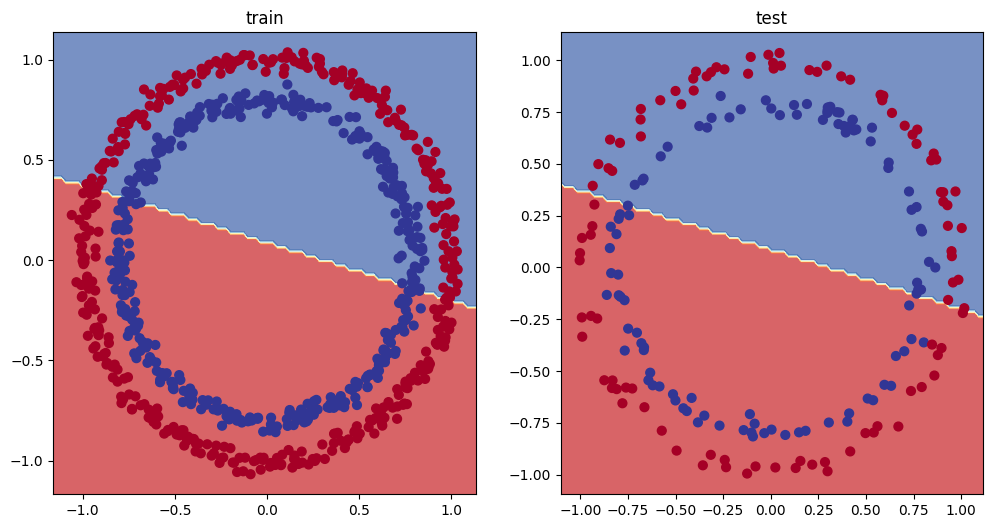

In [34]:
import numpy as np
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,X_test,y_test)

In [35]:
## improving model
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x))) ## speedup operations using this way

model_1=CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [36]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.7027,  0.6318],
                      [-0.6096,  0.6975],
                      [ 0.4053, -0.4098],
                      [-0.1564,  0.4236],
                      [-0.1865, -0.0910],
                      [ 0.5725, -0.1629],
                      [ 0.4901,  0.2931],
                      [-0.2310,  0.2724],
                      [ 0.0583,  0.4117],
                      [ 0.7053, -0.3723]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.5070,  0.2635,  0.4428, -0.2449,  0.5530, -0.0513, -0.1862, -0.1463,
                       0.6150,  0.5710], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.1534, -0.0588, -0.2706,  0.0696, -0.0660, -0.2639, -0.2561,  0.1757,
                        0.0315, -0.2831],
                      [-0.0227,  0.1804,  0.0566,  0.1483, -0.2938,  0.0505,  0.1584,  0.1597,
                       -0.2341, -0.2641],
                      [-0.1818, -0.220

In [37]:
## loss function

loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [38]:
##training

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

##training

for epoch in range(epochs):
  model_1.train()

  y_logits=model_1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## testing

  model_1.eval()
  with torch.inference_mode():
    test_logits=model_1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch%10==0:
    print(f" epoch: {epoch} | loss: {loss:.5f} | Acc : {acc:.2f}% | test_loss : {test_loss:.5f} | test_acc : {test_acc:.2f}%")

 epoch: 0 | loss: 0.69520 | Acc : 51.38% | test_loss : 0.69448 | test_acc : 56.00%
 epoch: 10 | loss: 0.69372 | Acc : 50.00% | test_loss : 0.69375 | test_acc : 52.00%
 epoch: 20 | loss: 0.69340 | Acc : 49.62% | test_loss : 0.69369 | test_acc : 49.50%
 epoch: 30 | loss: 0.69328 | Acc : 49.88% | test_loss : 0.69371 | test_acc : 48.50%
 epoch: 40 | loss: 0.69320 | Acc : 49.62% | test_loss : 0.69373 | test_acc : 49.50%
 epoch: 50 | loss: 0.69314 | Acc : 48.25% | test_loss : 0.69376 | test_acc : 50.00%
 epoch: 60 | loss: 0.69310 | Acc : 48.88% | test_loss : 0.69379 | test_acc : 49.50%
 epoch: 70 | loss: 0.69307 | Acc : 49.00% | test_loss : 0.69383 | test_acc : 49.50%
 epoch: 80 | loss: 0.69305 | Acc : 49.62% | test_loss : 0.69386 | test_acc : 48.50%
 epoch: 90 | loss: 0.69304 | Acc : 49.88% | test_loss : 0.69390 | test_acc : 47.00%
 epoch: 100 | loss: 0.69303 | Acc : 50.25% | test_loss : 0.69393 | test_acc : 47.00%
 epoch: 110 | loss: 0.69302 | Acc : 50.25% | test_loss : 0.69396 | test_acc 

In [39]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.7021,  0.6298],
                      [-0.6084,  0.7039],
                      [ 0.4046, -0.4190],
                      [-0.1559,  0.4209],
                      [-0.1872, -0.0931],
                      [ 0.5718, -0.1613],
                      [ 0.4899,  0.2827],
                      [-0.2315,  0.2514],
                      [ 0.0591,  0.4323],
                      [ 0.7052, -0.3599]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.5070,  0.2646,  0.4414, -0.2451,  0.5525, -0.0515, -0.1875, -0.1487,
                       0.6174,  0.5721], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.1458, -0.0683, -0.2657,  0.0643, -0.0655, -0.2617, -0.2596,  0.1724,
                        0.0252, -0.2790],
                      [-0.0330,  0.1673,  0.0631,  0.1411, -0.2932,  0.0534,  0.1534,  0.1553,
                       -0.2431, -0.2588],
                      [-0.1789, -0.217

In [40]:
next(model_1.parameters()).device

device(type='cuda', index=0)

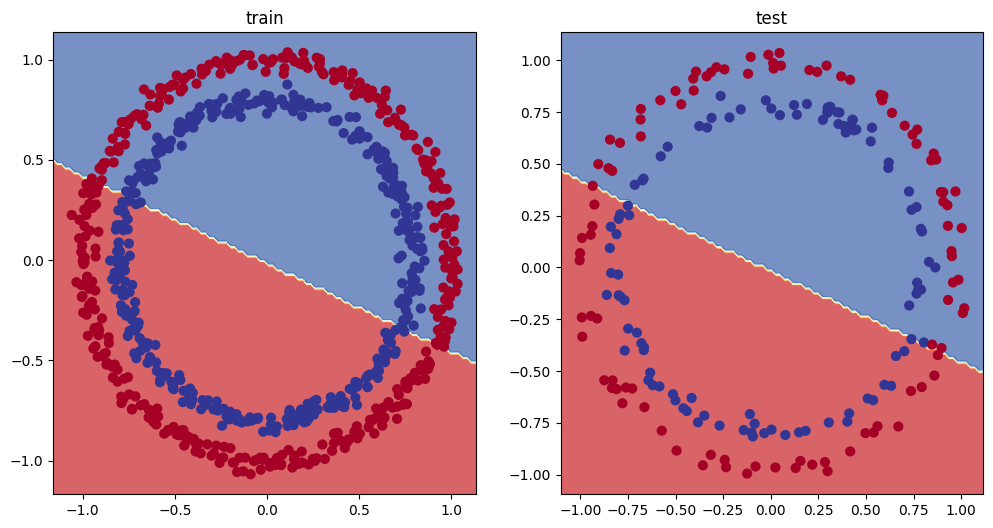

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1,X_test,y_test)

## recreating non linear data

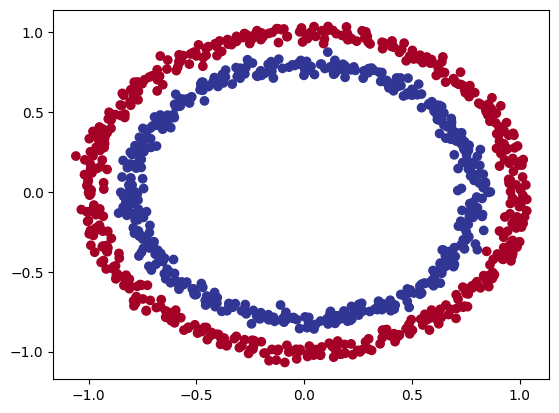

In [42]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [43]:
## converting data to tensor and train test split
import torch
from sklearn.model_selection import train_test_split

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [44]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [45]:
## building model with non linearity

from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3=CircleModelV2().to(device)
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [46]:
loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(params=model_3.parameters(),lr=0.1)

In [47]:
## training model
torch.manual_seed(42)
torch.cuda.manual_seed(42)


X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

epochs=1000

for epoch in range(epochs):
  model_3.train()
  y_logits=model_3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))


  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()
## testing
  model_3.eval()

  with torch.inference_mode():
    test_logits=model_3(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch%10==0:
    print(f" epoch: {epoch} | loss: {loss:.5f} | Acc : {acc:.2f}% | test_loss : {test_loss:.5f} | test_acc : {test_acc:.2f}%")



 epoch: 0 | loss: 0.69295 | Acc : 50.00% | test_loss : 0.69319 | test_acc : 50.00%
 epoch: 10 | loss: 0.69248 | Acc : 50.50% | test_loss : 0.69260 | test_acc : 50.00%
 epoch: 20 | loss: 0.69225 | Acc : 59.13% | test_loss : 0.69231 | test_acc : 56.50%
 epoch: 30 | loss: 0.69209 | Acc : 70.25% | test_loss : 0.69212 | test_acc : 68.00%
 epoch: 40 | loss: 0.69195 | Acc : 68.38% | test_loss : 0.69195 | test_acc : 71.00%
 epoch: 50 | loss: 0.69181 | Acc : 58.25% | test_loss : 0.69177 | test_acc : 58.00%
 epoch: 60 | loss: 0.69168 | Acc : 54.00% | test_loss : 0.69161 | test_acc : 54.50%
 epoch: 70 | loss: 0.69155 | Acc : 53.12% | test_loss : 0.69146 | test_acc : 53.00%
 epoch: 80 | loss: 0.69141 | Acc : 52.62% | test_loss : 0.69132 | test_acc : 53.00%
 epoch: 90 | loss: 0.69128 | Acc : 52.75% | test_loss : 0.69117 | test_acc : 53.00%
 epoch: 100 | loss: 0.69115 | Acc : 52.88% | test_loss : 0.69102 | test_acc : 52.50%
 epoch: 110 | loss: 0.69103 | Acc : 52.88% | test_loss : 0.69088 | test_acc 

In [48]:
model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(X_test.to(device)))).squeeze()
y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

In [49]:
next(model_3.parameters()).device

device(type='cuda', index=0)

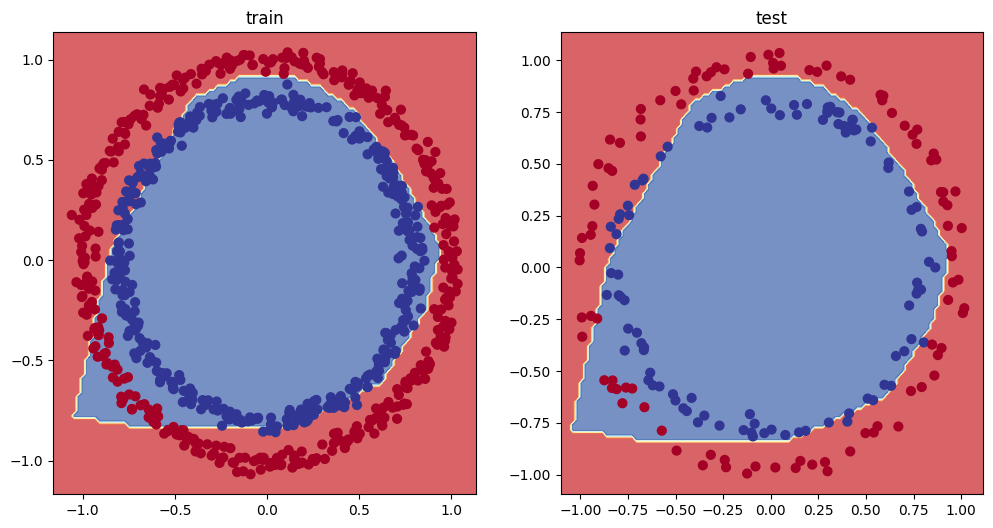

In [50]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3,X_test,y_test)

## Replicating non linear activation functions

In [51]:
A=torch.arange(-10,10,1).type(torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

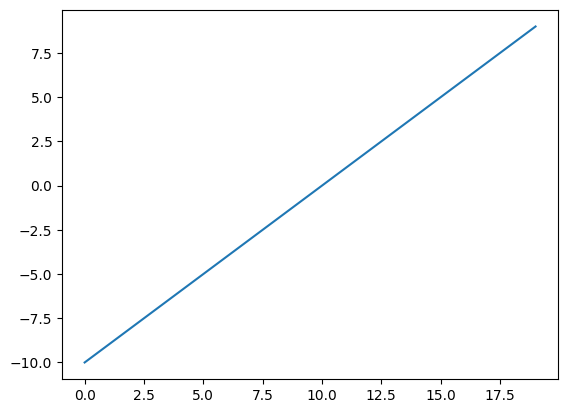

In [52]:
plt.plot(A)

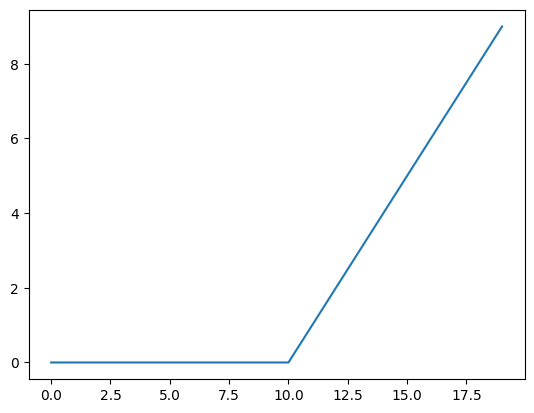

In [53]:
plt.plot(torch.relu(A))

In [54]:
def relu(x):
  return torch.maximum(torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

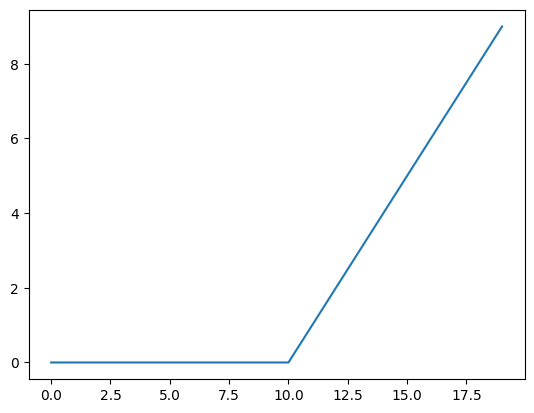

In [55]:
plt.plot(relu(A))

In [56]:
def sigmoid(x):
  return(1/(1+torch.exp(-x)))

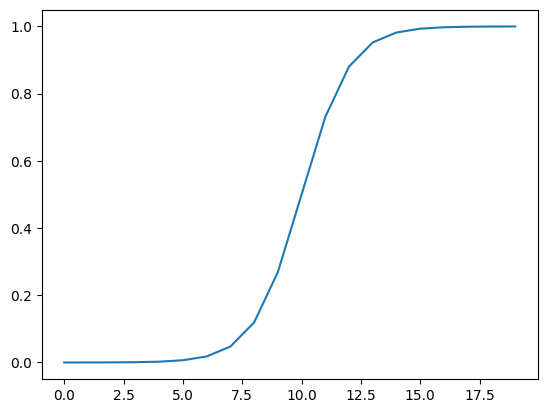

In [57]:
plt.plot(torch.sigmoid(A));

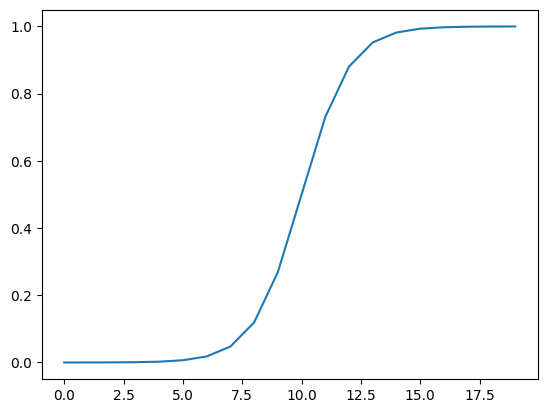

In [58]:
plt.plot(sigmoid(A));

## creating a toy data for multi class classification

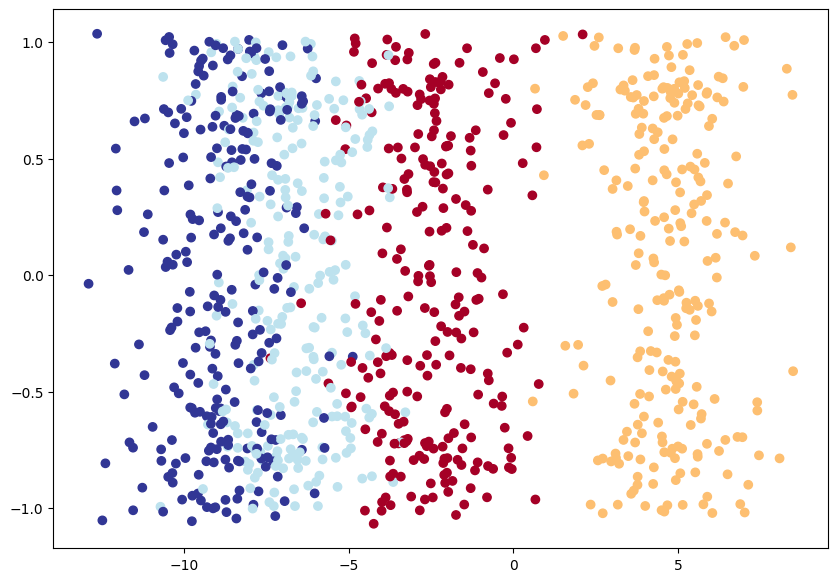

In [59]:
## dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

## HYPERPARAMETERS

NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42

  ## Creating multi class data

X_blob, y_blob=make_blobs(n_samples=1000,
                          n_features=NUM_FEATURES,
                          centers=NUM_CLASSES,
                          cluster_std=1.5 , ## little shake up to clusters
                          random_state=RANDOM_SEED)


## turn data to tensor

X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)


## split into train test

X_blob_train, X_blob_test, y_blob_train, y_blob_test=train_test_split(X_blob,
                                                                      y_blob,
                                                                      test_size=0.2,
                                                                      random_state=RANDOM_SEED)


plt.figure(figsize=(10,7))

plt.scatter(X_blob[:,0],X[:,1],c=y_blob,cmap=plt.cm.RdYlBu);

In [60]:
### building model for multi class classification
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    """
    Args:
    input_features :which is int datatype and number of input features
    output_features : which is int and number of output featuees(number of classes)
    hidden units: which is int and number of hidden units between layes

    Returns:

    """
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)


model_4=BlobModel(input_features=2,
                  output_features=4,
                  hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [61]:
next(model_4.parameters()).device

device(type='cuda', index=0)

In [62]:
## loss function and optimizer

loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model_4.parameters(),lr=0.1)

In [63]:
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [64]:
y_pred_probs=torch.softmax(y_logits,dim=1)
y_pred_probs[:5]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')

In [65]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [66]:
torch.argmax(y_pred_probs[0])

tensor(1, device='cuda:0')

In [67]:
y_preds=torch.argmax(y_pred_probs,dim=1)

y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [68]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=100
X_blob_train,X_blob_test=X_blob_train.to(device),X_blob_test.to(device)
y_blob_train,y_blob_test=y_blob_train.to(device),y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()
  y_logits=model_4(X_blob_train)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss=loss_fn(y_logits,y_blob_train)
  acc=accuracy_fn(y_true=y_blob_train,y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## testing

  model_4.eval()
  with torch.inference_mode():
    test_logits=model_4(X_blob_test)
    test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss=loss_fn(test_logits,y_blob_test)

    test_acc=accuracy_fn(y_true=y_blob_test,y_pred=test_preds)
  if epoch%10==0:
    print(f" epoch: {epoch} | loss: {loss:.5f} | Acc : {acc:.2f}% | test_loss : {test_loss:.5f} | test_acc : {test_acc:.2f}%")


 epoch: 0 | loss: 1.15883 | Acc : 40.38% | test_loss : 1.07554 | test_acc : 48.00%
 epoch: 10 | loss: 0.64476 | Acc : 96.75% | test_loss : 0.66069 | test_acc : 97.50%
 epoch: 20 | loss: 0.42535 | Acc : 98.50% | test_loss : 0.43074 | test_acc : 100.00%
 epoch: 30 | loss: 0.25294 | Acc : 99.12% | test_loss : 0.24508 | test_acc : 99.50%
 epoch: 40 | loss: 0.11232 | Acc : 99.25% | test_loss : 0.10229 | test_acc : 99.50%
 epoch: 50 | loss: 0.06627 | Acc : 99.25% | test_loss : 0.05848 | test_acc : 99.50%
 epoch: 60 | loss: 0.05068 | Acc : 99.25% | test_loss : 0.04293 | test_acc : 99.50%
 epoch: 70 | loss: 0.04300 | Acc : 99.25% | test_loss : 0.03491 | test_acc : 99.50%
 epoch: 80 | loss: 0.03836 | Acc : 99.25% | test_loss : 0.02988 | test_acc : 99.50%
 epoch: 90 | loss: 0.03525 | Acc : 99.25% | test_loss : 0.02663 | test_acc : 99.50%


In [69]:
## make predictions
model_4.eval()
with torch.inference_mode():
  y_logits=(model_4(X_blob_test))

  y_logits[:5]

In [70]:
y_pred_probs=torch.softmax(y_logits,dim=1)

In [71]:
y_preds=torch.argmax(y_pred_probs,dim=1)

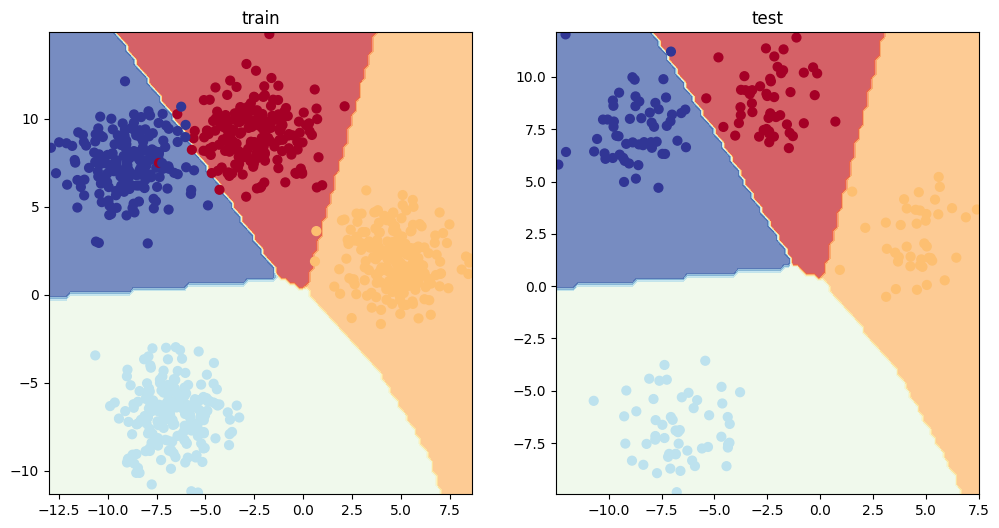

In [72]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

In [74]:
!nvidia-smi

Fri Jul 11 04:13:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   65C    P0             27W /   70W |     158MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----